# 1. Edge Detection

In [58]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

def cv2_imshow(img):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(20,10))
    plt.imshow(rgb_img)
    plt.show()

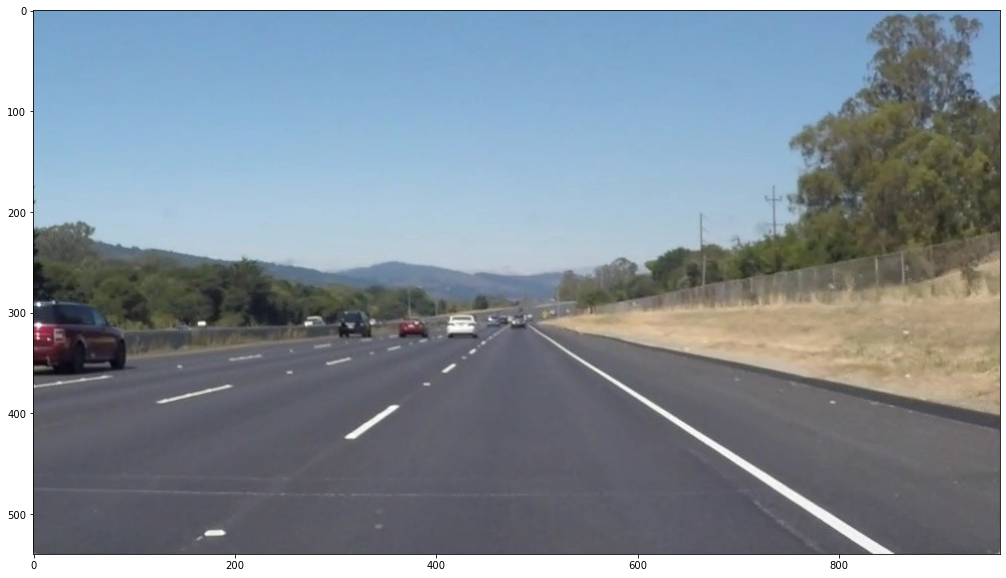

540 960 3


In [59]:
frame = cv2.imread('./Images/car3.jpeg')
height, width, channels = frame.shape
cv2_imshow(frame)
print(height, width, channels)

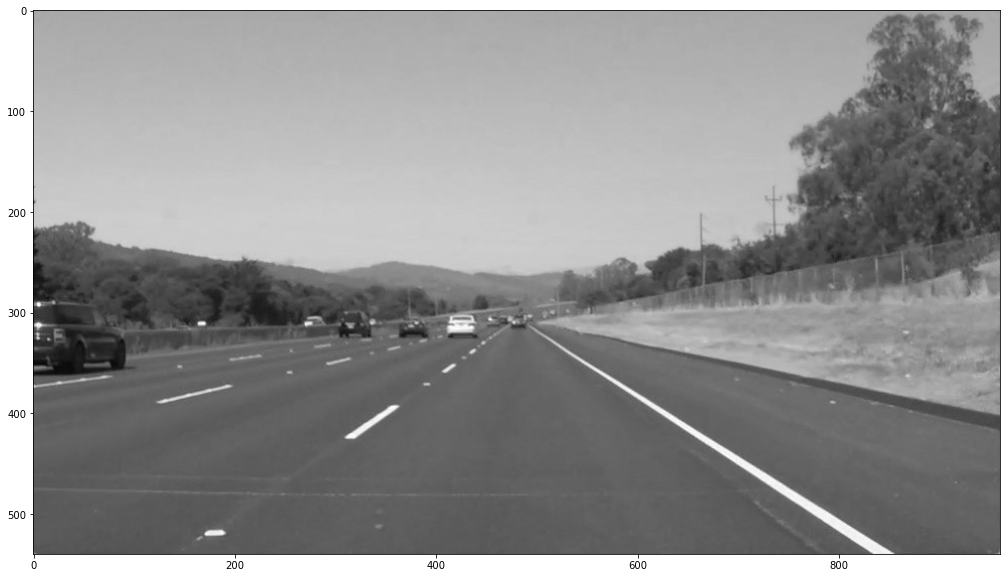

540 960


In [60]:
# Convert Image To GrayScale
gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
height, width = gray.shape
cv2_imshow(gray)
print(height, width)

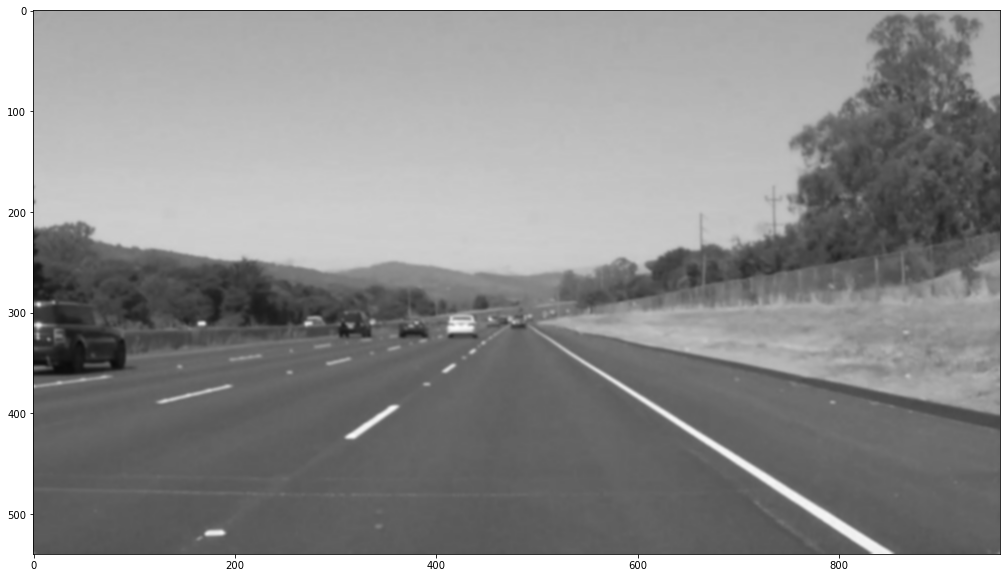

In [61]:
# GaussianBlur for refusing noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)
cv2_imshow(blur)


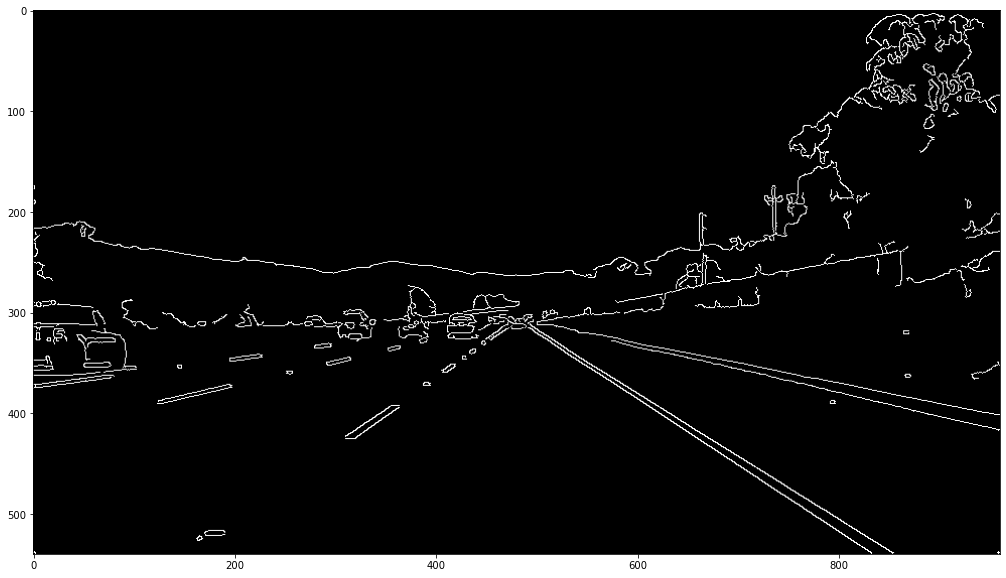

In [69]:
canny = cv2.Canny(blur, 30, 130)
cv2_imshow(canny)

# 2. Region Of Interest

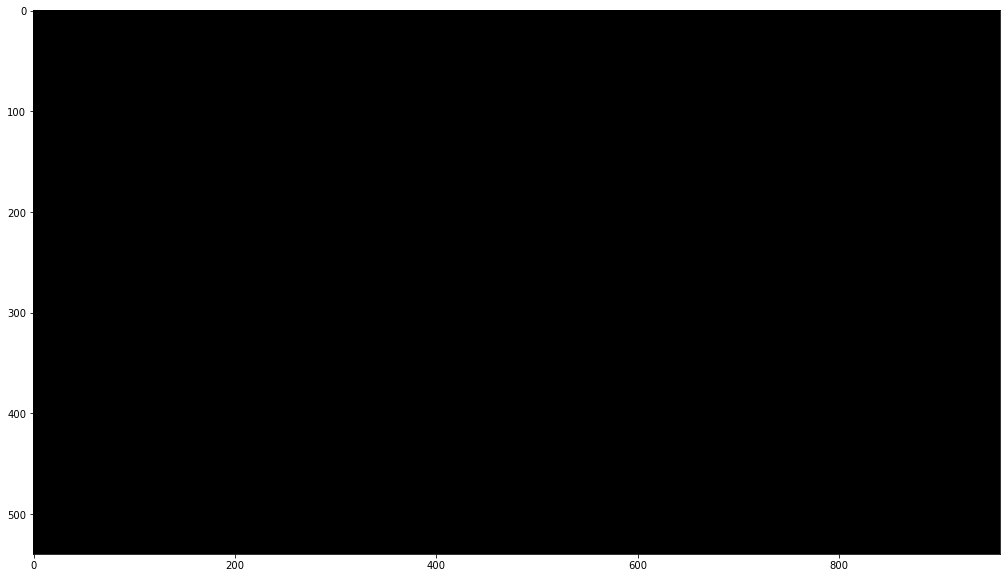

In [70]:
mask = np.zeros((height, width), dtype='uint8')
cv2_imshow(mask)

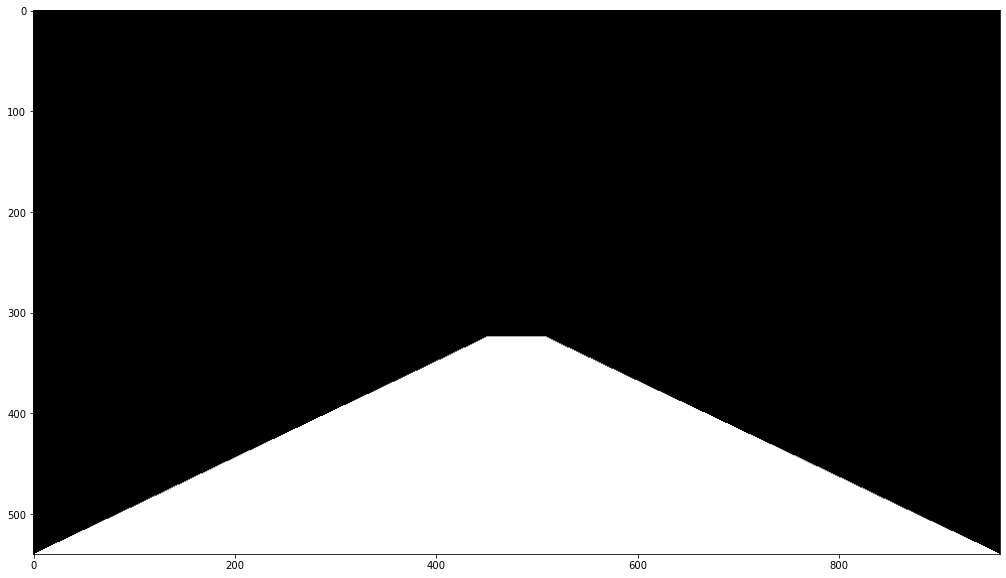

In [71]:
polyHeight = int(0.60 * height)
polyLeft = int(0.47 * width)
polyRight = int (0.53 * width)
polygons = np.array([[(0, height), (polyLeft, polyHeight), (polyRight, polyHeight), (width, height)]])
cv2.fillPoly(mask, polygons, 255)
cv2_imshow(mask)

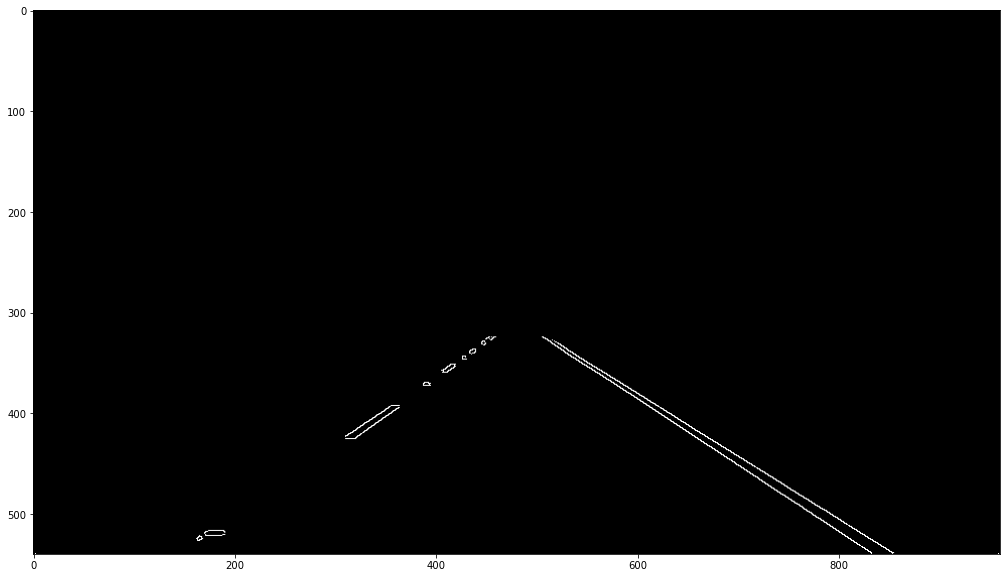

In [72]:
# Bitwise Operation Between Img And Mask
masked = cv2.bitwise_and(canny, mask)
cv2_imshow(masked)

# 3. Lane Detection

[[798 504 853 538]]
[[750 484 774 500]]
[[742 469 773 488]]
[[591 379 671 433]]
[[666 422 717 453]]
[[529 336 573 363]]
[[349 404 362 394]]
[[331 409 341 402]]
[[596 377 607 385]]
[[711 458 730 472]]
[[622 394 634 401]]
[[506 324 552 355]]
[[787 508 815 528]]
[[327 419 343 407]]
[[314 420 326 412]]
[[639 405 654 414]]
[[576 369 591 380]]
[[775 501 788 510]]
[[718 454 730 461]]


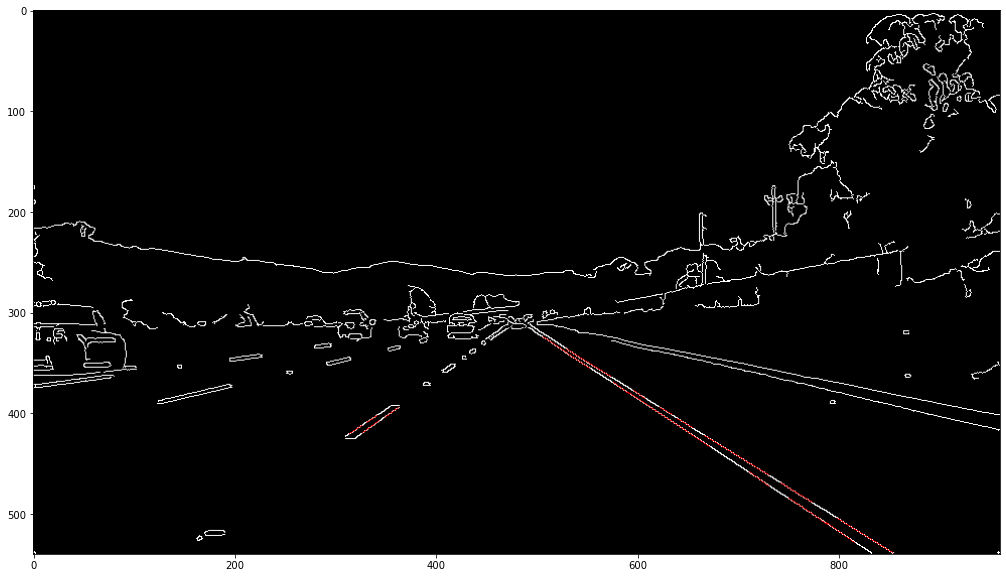

In [78]:
color = cv2.cvtColor(canny, cv2.COLOR_GRAY2RGB)
lines = cv2.HoughLinesP(masked, 2, np.pi / 180, 20, 20, 10)
if (lines is not None):
    for line in lines:
        print(line)
        x1, y1, x2, y2 = line.reshape(4)
        cv2.line(color, (x1, y1), (x2, y2), (0, 0, 255), 1)
        
cv2_imshow(color)

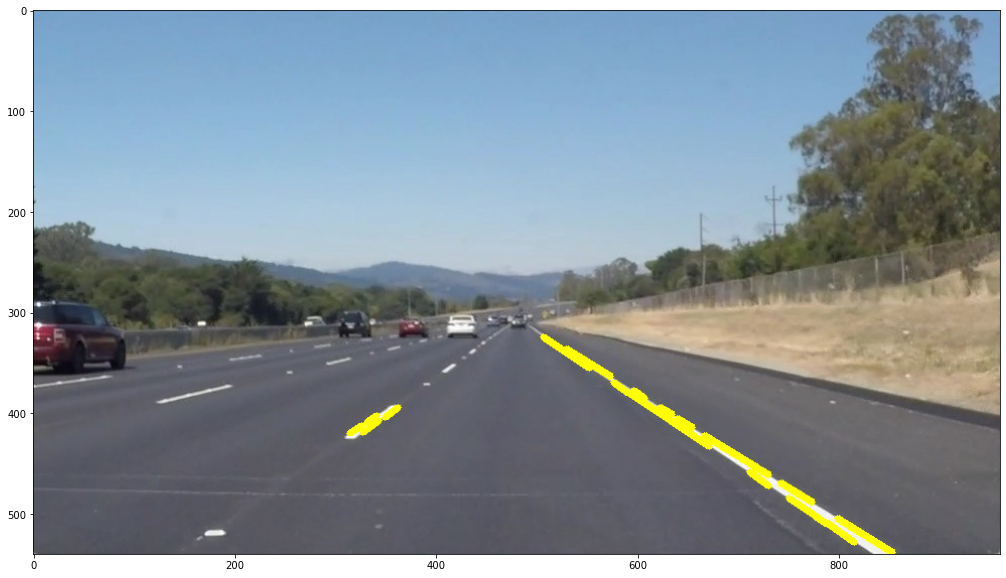

In [74]:
for line in lines:
    x1, y1, x2, y2 = line.reshape(4)
    cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 255), 5)
cv2_imshow(frame)